In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import neurokit2 as nk
import pickle
from tqdm import tqdm

In [5]:
with open ('saved_filtered_data.pkl','rb') as f:
    filtered_data = pickle.load(f)

In [32]:
# R peak indecies:

select_key = 'C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0001.mat'

ecg_signal = filtered_data[select_key].flatten()
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=500)


print("R-peaks locations:", rpeaks)

R-peaks locations: {'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([  236,   533,   832,  1128,  1424,  1720,  2015,  2318,  2611,
        2908,  3202,  3500,  3801,  4097,  4400,  4697,  4998,  5301,
        5598,  5899,  6196,  6495,  6797,  7099,  7397,  7729,  8026,
        8325,  8622,  8917,  9213,  9510,  9811, 10105, 10401, 10695,
       10994, 11295, 11591, 11893, 12191, 12491, 12795, 13092, 13393,
       13689, 13988, 14291, 14593, 14891, 15271, 15522, 15854, 16151,
       16447, 16708, 17050, 17341, 17634, 17932, 18190, 18524, 18824,
       19120, 19424, 19685, 20022, 20324, 20621, 20922, 21184, 21484,
       21822, 22122, 22421, 22750, 23046, 23345, 23642, 23937, 24233,
       24529, 24832, 25125, 25421, 25715, 26014, 26315, 26611, 26914,
       27211, 27512, 27815, 28112, 28412, 28709, 29008, 29311, 29613,
       29912, 30239, 30535, 30834, 31131, 31426, 31723, 32018, 32320,
       32613, 32911, 33205, 33503, 33804, 34100, 34403, 34701, 35000,


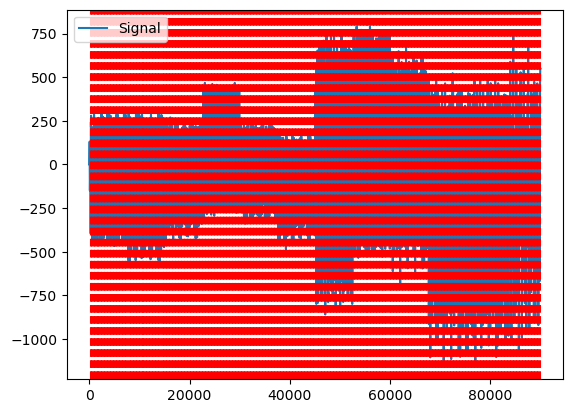

In [33]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

<Figure size 1500x600 with 0 Axes>

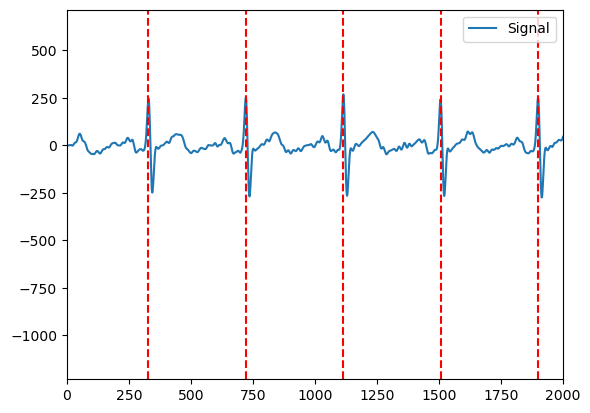

In [42]:
select_key = 'C:\\Users\\Alex\\Downloads\\datasets\\training\\data\\cpsc_2018\\g1\\A0002.mat'
filtered_ecg_signal = filtered_data[select_key]
sampling_rate = 500

_, filtered_rpeaks = nk.ecg_peaks(filtered_ecg_signal, sampling_rate=sampling_rate)


plt.figure(figsize=(15, 6)) 
plot = nk.events_plot(filtered_rpeaks['ECG_R_Peaks'], filtered_ecg_signal)
plt.xlim(0, len(filtered_ecg_signal) / 30)
plt.show()

<Figure size 1500x600 with 0 Axes>

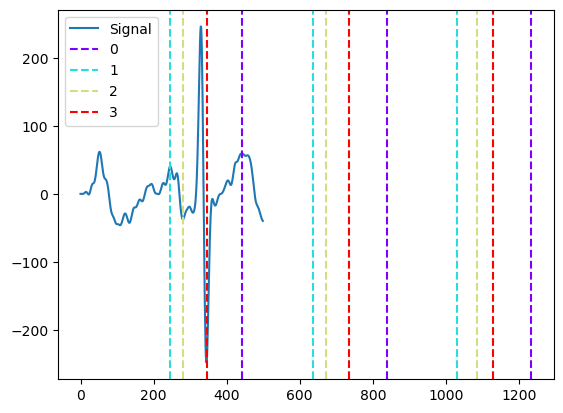

In [43]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(filtered_ecg_signal, filtered_rpeaks, sampling_rate=sampling_rate, method="peak")

# Zooming into the first 3 R-peaks, with focus on T-peaks, P-peaks, Q-peaks, and S-peaks
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], filtered_ecg_signal[:500])
plt.show()

In [ ]:
#Classes: 
    #'426783006': 'Sinus Rhythm',
    #'427084000': 'Sinus Tachycardia',
    #'426177001': 'Sinus Bradycardia',
    #'427172004': 'PVC',
    #'270492004': '1st Degree AV block',
    #'164865005': 'Myocardial infarction',
    #'55930002': 'ST changes'

In [44]:
ecg_features = {}
progress_bar = tqdm(total=len(filtered_data), desc="Extracting Features")

# Function to safely convert to list and handle NumPy types
def safe_to_list(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (np.int64, np.float64)):  # Convert NumPy integers and floats to Python types
        return obj.item()
    elif isinstance(obj, list):
        return [safe_to_list(i) for i in obj]  # Recursively handle lists
    else:
        return obj


for filepath, filtered_signal in filtered_data.items():
    try:
        _, filtered_rpeaks = nk.ecg_peaks(filtered_signal, sampling_rate=sampling_rate)
        _, waves_peak = nk.ecg_delineate(filtered_signal, filtered_rpeaks, sampling_rate=sampling_rate, method="peak")
        ecg_features[filepath] = {
            "ECG_R_Peaks": safe_to_list(filtered_rpeaks['ECG_R_Peaks']),
            "ECG_T_Peaks": safe_to_list(waves_peak['ECG_T_Peaks']),
            "ECG_P_Peaks": safe_to_list(waves_peak['ECG_P_Peaks']),
            "ECG_Q_Peaks": safe_to_list(waves_peak['ECG_Q_Peaks']),
            "ECG_S_Peaks": safe_to_list(waves_peak['ECG_S_Peaks'])
        }
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")

    progress_bar.update(1)

progress_bar.close()


output_json_path = 'C:\\Users\\Alex\\Downloads\\datasets\\Extra\\test_1.json'
with open(output_json_path, 'w') as json_file:
    json.dump(ecg_features, json_file)

print(f"ECG features saved to {output_json_path}")

Extracting Features:   0%|          | 6/20674 [00:08<9:00:31,  1.57s/it] 

KeyboardInterrupt: 